In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

##e2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity



In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ranakhird22/project/main/netflix_titles.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
 df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


# count the missing data in each row 

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
df.country.fillna('other', inplace=True)

In [ ]:
df.director.fillna('missing data', inplace=True)

In [ ]:
df.cast.fillna('missing data', inplace=True)

In [ ]:
#duration
#df.duration.fillna('other', inplace=True)

In [ ]:
df.dropna(subset=['date_added'], inplace = True)
df.dropna(subset=['rating'], inplace = True)
df.dropna(subset=['duration'], inplace = True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.dropna(subset=['date_added'], inplace = True)
df.dropna(subset=['rating'], inplace = True)
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df['date_added']

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8790, dtype: object

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format = "%B %d, %Y")

In [ ]:
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['month_add_name'] = df['date_added'].dt.month_name()
#

In [ ]:
df.drop(['date_added'], axis = 1,inplace = True)


In [ ]:
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,month_add_name
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,missing data,United States,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,9,September
1,s2,TV Show,Blood & Water,missing data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,9,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",other,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,9,September
3,s4,TV Show,Jailbirds New Orleans,missing data,missing data,other,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,9,September
4,s5,TV Show,Kota Factory,missing data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,9,September


In [ ]:
df['month_add_name'] 

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: month_add_name, Length: 8790, dtype: object

In [ ]:
##base on this plot the movie type is more in netflix 

**Visualization **

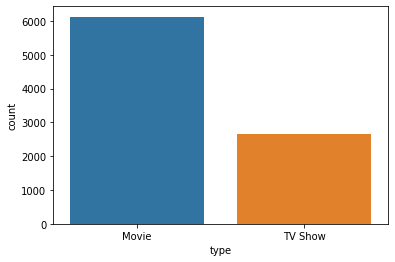

In [ ]:
sns.countplot(x ='type', data = df)
 
plt.show()


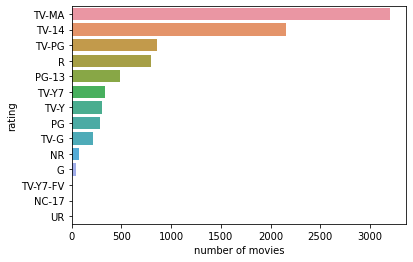

In [ ]:
##base on this plot the rate TV_MA is more in netflix 
ratings = df['rating'].value_counts()
sns.barplot(x= ratings, y= ratings.index);
plt.ylabel('rating');
plt.xlabel ('number of movies');

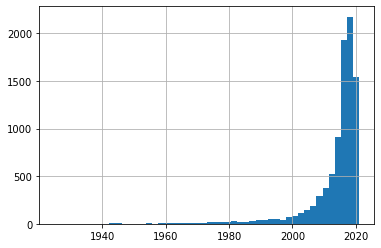

In [ ]:
## base on this plot 2019 has the most number of  Movie and TV_show released  in netflix 
df["release_year"].hist(bins=50)

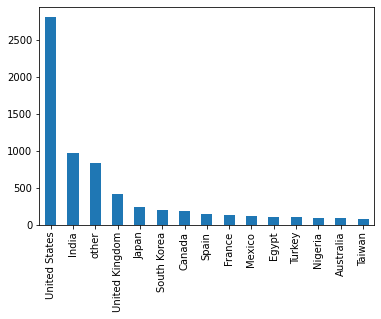

In [ ]:
## base on this plot the Most Movies and TV shows are from United States

df["country"].value_counts()[:15].plot(kind="bar")

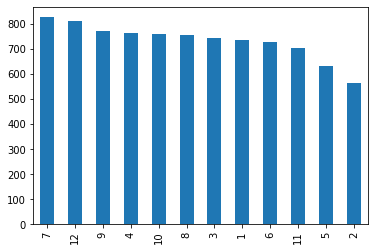

In [ ]:
df["month_added"].value_counts()[:15].plot(kind="bar")

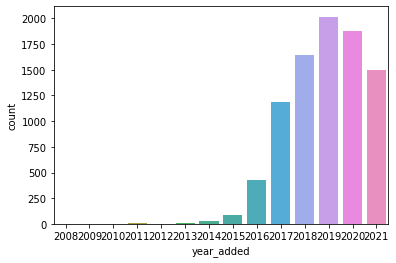

In [ ]:
#add some space 
sns.countplot(x ='year_added', data = df)
 
plt.show()

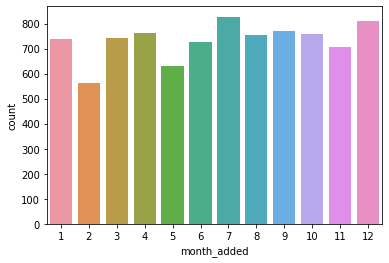

In [ ]:
#groped be year

sns.countplot(x ='month_added', data = df)
 
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df['description']

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8790, dtype: object

In [ ]:


# Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(8790, 18878)

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie 
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies 
    sim_scores = list(enumerate(cosine_sim[idx]))
        
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]

In [ ]:
get_recommendations('Blood & Water')

5344    Message from the King
1884      Walk Away from Love
4285                    Lilli
4271               Lion Pride
4209               Next Enti?
613                 Voiceless
108                 Dive Club
1905             Cold Harbour
6289                  Bewafaa
5485                Ram Jaane
Name: title, dtype: object

In [ ]:

get_recommendations('Mortel')

256                       Nneka The Pretty Serpent
3674                  PILI Fantasy: War of Dragons
800                                Mosquita y Mari
6749                             Figures of Speech
4511         Edgar Rice Burroughs' Tarzan and Jane
7535    My Entire High School Sinking Into the Sea
6760                                     FirstBorn
4918                                 Psychokinesis
5481                                     Chamatkar
2190                          The Umbrella Academy
Name: title, dtype: object

# **recommendation system  with more fueater** 





In [ ]:
df2=df

show_id', 'type', 'title', 'director', 'cast', 'country',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'year_added', 'month_added', 'month_add_name'],
      dtype='object'

In [ ]:
df2[['title', 'cast', 'director', 'description', 'listed_in']].head(5)

,title,cast,director,description,listed_in
0,Dick Johnson Is Dead,missing data,Kirsten Johnson,"As her father nears the end of his life, filmm...",Documentaries
1,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",missing data,"After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries"
2,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Julien Leclercq,To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act..."
3,Jailbirds New Orleans,missing data,missing data,"Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV"
4,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",missing data,In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
#f=df2['title']+' '+df2['director'] + ' ' + df2['cast'] + ' ' +df2['listed_in']+' '+ df2['description']

In [ ]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
features = ['cast', 'director', 'description', 'listed_in']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [ ]:

def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

df2['soup'] = df2.apply(create_soup, axis=1)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])



In [ ]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
#X = cv.fit_transform(df2['soup']).toarray()

#count = CountVectorizer(stop_words='english')
#count_matrix = count.fit_transform(df2['soup'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [ ]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [ ]:
get_recommendations('Peaky Blinders', cosine_sim2)

8431          The Murder Detectives
3034                    Giri / Haji
519                   I AM A KILLER
5032    The Frankenstein Chronicles
4951                         Loaded
3789                 Killer Ratings
4809                  Kiss Me First
366                         Glow Up
1603                   Alien Worlds
2184                       Get Even
Name: title, dtype: object

In [ ]:
get_recommendations('Peaky Blinders', cosine_sim2)

8431          The Murder Detectives
3034                    Giri / Haji
519                   I AM A KILLER
5032    The Frankenstein Chronicles
4951                         Loaded
3789                 Killer Ratings
4809                  Kiss Me First
366                         Glow Up
1603                   Alien Worlds
2184                       Get Even
Name: title, dtype: object

In [ ]:
get_recommendations('Peaky Blinders',cosine_sim2)

8431          The Murder Detectives
3034                    Giri / Haji
519                   I AM A KILLER
5032    The Frankenstein Chronicles
4951                         Loaded
3789                 Killer Ratings
4809                  Kiss Me First
366                         Glow Up
1603                   Alien Worlds
2184                       Get Even
Name: title, dtype: object

# rating




In [ ]:
#imdb_ratings=pd.read_csv('IMDb ratings.csv',usecols=['weighted_average_vote'])
#imdb_titles=pd.read_csv('IMDb movies.csv', usecols=['title','year','genre'])

In [ ]:
#ratings = pd.DataFrame({'Title':imdb_titles.title,
                      
                     #  'IMDb Rating':imdb_ratings.weighted_average_vote,
                     #  'Genre':imdb_titles.genre})
#ratings.drop_duplicates(subset=['Title', 'IMDb Rating'],inplace=True)
#ratings.shape

In [ ]:
#ratings.dropna()
#joint_data = ratings.merge(df, left_on='Title', right_on='title', how='inner')
#joint_data = joint_data.sort_values(by='IMDb Rating', ascending=False)

#merged = nf.merge(netflix, how="inner", left_on=['Title'], right_on=['title'])
#merged.head()


In [ ]:
#joint_data.drop(['Title'], axis = 1 ,inplace=True)

In [ ]:
#ratings.head()

Kmean clustring 

In [ ]:
from sklearn.cluster import KMeans

# **NLP**

pridect the value of 

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
dfNLP=df

In [ ]:
dfNLP['listed_in'].value_counts()

dramas,internationalmovies                           362
documentaries                                        359
stand-upcomedy                                       334
comedies,dramas,internationalmovies                  274
dramas,independentmovies,internationalmovies         252
                                                    ... 
romantictvshows,teentvshows                            1
documentaries,dramas                                   1
children&familymovies,comedies,faith&spirituality      1
comedies,documentaries,internationalmovies             1
internationaltvshows,tvaction&adventure,tvhorror       1
Name: listed_in, Length: 513, dtype: int64

In [ ]:
#dfNLP["dec"]=dfNLP['title']+ ' ' + dfNLP['director'] + ' ' + dfNLP['cast'] + dfNLP['description']
dfNLP["dec"]= dfNLP['description']
#features = ['cast', 'director', 'description', 'listed_in']

##drop the colum don ue



In [ ]:
import nltk

In [ ]:
filtered_genres = dfNLP.listed_in.str.split(',', expand=True).stack().reset_index(level=1, drop=True);

In [ ]:
#df['listed_in']

all_genres = nltk.FreqDist(filtered_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

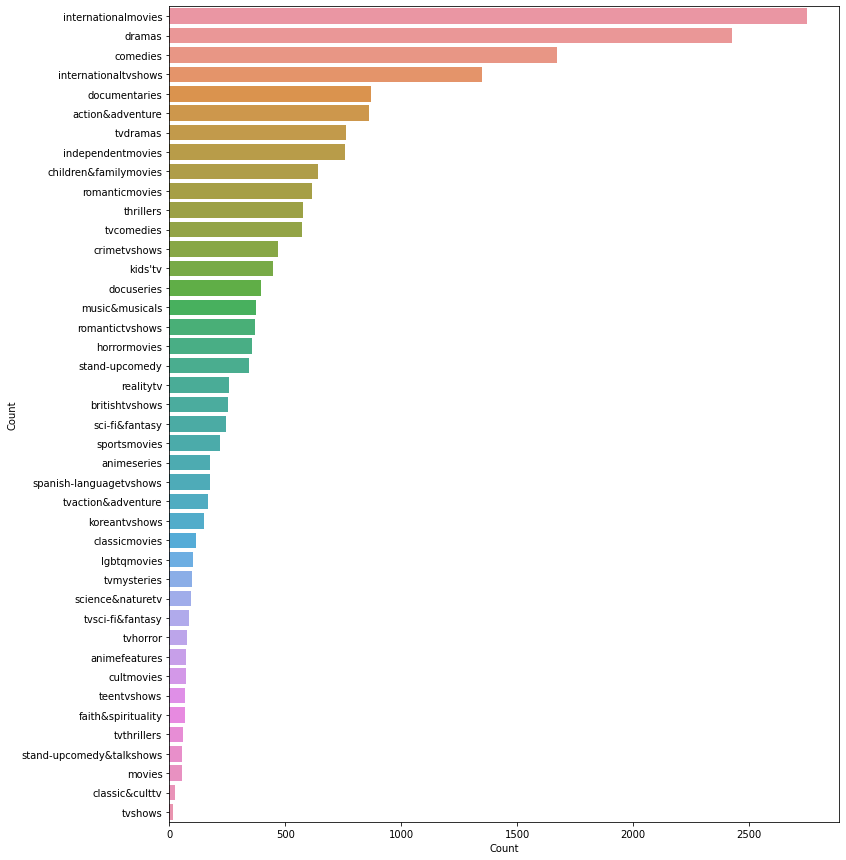

In [ ]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

In [ ]:
# function for text cleaning 
def clean_text(text):
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text
dfNLP['clean_dec'] = dfNLP['dec'].apply(lambda x: clean_text(x))


In [ ]:
dfNLP['clean_dec'] = dfNLP['dec'].apply(lambda x: clean_text(x))

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

dfNLP['clean_dec']=dfNLP['clean_dec'].apply(lambda x: remove_stopwords(x))

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(df['listed_in'])

# transform target variable
y = multilabel_binarizer.transform(df['listed_in'])

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 0, 0]])

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [ ]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(dfNLP['clean_dec'], y, test_size=0.2, random_state=9)

In [ ]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [ ]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [ ]:
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression())

In [ ]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [ ]:
y_pred[3]

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0])

In [ ]:
#this shold returend the movie grene it work but formation not right
multilabel_binarizer.inverse_transform(y_pred)[2]

(',', 'a', 'c', 'd', 'e', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'v')

In [ ]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.8539078727650389

In [ ]:
df['listed_in'].nunique()

513

In [ ]:
df4=df

In [ ]:


df4[['genre1', 'genre2', 'genre3']]=df4['listed_in'].str.split(',', expand=True)


In [ ]:
df4.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,month_add_name,soup,dec,clean_dec,genre1,genre2,genre3
0,s1,Movie,Dick Johnson Is Dead,kirstenjohnson,missingdata,United States,2020,PG-13,90 min,documentaries,"asherfathernearstheendofhislife,filmmakerkirst...",2021,9,September,Dick Johnson Is Dead kirstenjohnson missingdat...,"asherfathernearstheendofhislife,filmmakerkirst...",asherfathernearstheendofhislife filmmakerkirst...,documentaries,None,None
1,s2,TV Show,Blood & Water,missingdata,"amaqamata,khosingema,gailmabalane,thabangmolab...",South Africa,2021,TV-MA,2 Seasons,"internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou...",2021,9,September,"Blood & Water missingdata amaqamata,khosingema...","aftercrossingpathsataparty,acapetownteensetsou...",aftercrossingpathsataparty acapetownteensetsou...,internationaltvshows,tvdramas,tvmysteries
2,s3,TV Show,Ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...",other,2021,TV-MA,1 Season,"crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille...",2021,9,September,"Ganglands julienleclercq samibouajila,tracygot...","toprotecthisfamilyfromapowerfuldruglord,skille...",toprotecthisfamilyfromapowerfuldruglord skille...,crimetvshows,internationaltvshows,tvaction&adventure
3,s4,TV Show,Jailbirds New Orleans,missingdata,missingdata,other,2021,TV-MA,1 Season,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein...",2021,9,September,Jailbirds New Orleans missingdata missingdata ...,"feuds,flirtationsandtoilettalkgodownamongthein...",feuds flirtationsandtoilettalkgodownamongthein...,docuseries,realitytv,None
4,s5,TV Show,Kota Factory,missingdata,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...",India,2021,TV-MA,2 Seasons,"internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...,2021,9,September,"Kota Factory missingdata mayurmore,jitendrakum...",inacityofcoachingcentersknowntotrainindia’sfin...,inacityofcoachingcentersknowntotrainindia sfin...,internationaltvshows,romantictvshows,tvcomedies


In [ ]:
df['genre1'].nunique()

36

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
df3=df

In [ ]:
hj=pd.get_dummies(df4, columns = [ 'genre1'])

In [ ]:
one_hot_encoded_data = pd.get_dummies(df4, columns = ['title', 'genre1'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df3['title_encoded'] = le_sex.fit_transform(df4['title'])
df3['genre1_encoded'] = le_sex.fit_transform(df4['genre1'])
df3['type_encoded'] = le_sex.fit_transform(df4['type'])
#df3['release_year_encoded'] = le_sex.fit_transform(df4['release_year'])
#df3['country_encoded'] = le_sex.fit_transform(df4['country'])
df3['rating_encoded'] = le_sex.fit_transform(df4['rating'])
df3['description_encoded'] = le_sex.fit_transform(df4['description'])


In [ ]:
df3.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,month_add_name,soup,dec,clean_dec,genre1,genre2,genre3,title_encoded,genre1_encoded,type_encoded,rating_encoded,description_encoded
0,s1,Movie,Dick Johnson Is Dead,kirstenjohnson,missingdata,United States,2020,PG-13,90 min,documentaries,"asherfathernearstheendofhislife,filmmakerkirst...",2021,9,September,Dick Johnson Is Dead kirstenjohnson missingdat...,"asherfathernearstheendofhislife,filmmakerkirst...",asherfathernearstheendofhislife filmmakerkirst...,documentaries,None,None,1972,10,0,4,2093
1,s2,TV Show,Blood & Water,missingdata,"amaqamata,khosingema,gailmabalane,thabangmolab...",South Africa,2021,TV-MA,2 Seasons,"internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou...",2021,9,September,"Blood & Water missingdata amaqamata,khosingema...","aftercrossingpathsataparty,acapetownteensetsou...",aftercrossingpathsataparty acapetownteensetsou...,internationaltvshows,tvdramas,tvmysteries,1088,16,1,8,706
2,s3,TV Show,Ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...",other,2021,TV-MA,1 Season,"crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille...",2021,9,September,"Ganglands julienleclercq samibouajila,tracygot...","toprotecthisfamilyfromapowerfuldruglord,skille...",toprotecthisfamilyfromapowerfuldruglord skille...,crimetvshows,internationaltvshows,tvaction&adventure,2646,8,1,8,7330
3,s4,TV Show,Jailbirds New Orleans,missingdata,missingdata,other,2021,TV-MA,1 Season,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein...",2021,9,September,Jailbirds New Orleans missingdata missingdata ...,"feuds,flirtationsandtoilettalkgodownamongthein...",feuds flirtationsandtoilettalkgodownamongthein...,docuseries,realitytv,None,3499,11,1,8,3612
4,s5,TV Show,Kota Factory,missingdata,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...",India,2021,TV-MA,2 Seasons,"internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...,2021,9,September,"Kota Factory missingdata mayurmore,jitendrakum...",inacityofcoachingcentersknowntotrainindia’sfin...,inacityofcoachingcentersknowntotrainindia sfin...,internationaltvshows,romantictvshows,tvcomedies,3853,16,1,8,4367


In [ ]:
#df3['title_encoded'],'genre1_encoded','type_encoded','rating_encoded')
df3[["title_encoded", "genre1_encoded","type_encoded","rating_encoded","description_encoded"]]

,title_encoded,genre1_encoded,type_encoded,rating_encoded,description_encoded
0,1972,10,0,4,2093
1,1088,16,1,8,706
2,2646,8,1,8,7330
3,3499,11,1,8,3612
4,3853,16,1,8,4367
...,...,...,...,...,...
8802,8753,9,0,5,1847
8803,8756,17,1,11,8461
8804,8757,7,0,5,5221
8805,8760,4,0,3,3310


In [ ]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df3[["title_encoded", "genre1_encoded","type_encoded","rating_encoded","description_encoded"]])

In [ ]:
from sklearn.cluster import KMeans
kmeans_1 = KMeans(n_clusters=4)

In [ ]:
ypred = kmeans_1.fit_predict(df3[["title_encoded", "genre1_encoded","type_encoded","rating_encoded","description_encoded"]])

In [ ]:
df3['cluster']=ypred

In [ ]:
df3

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,year_added,month_added,month_add_name,soup,dec,clean_dec,genre1,genre2,genre3,title_encoded,genre1_encoded,type_encoded,rating_encoded,description_encoded,cluster
0,s1,Movie,Dick Johnson Is Dead,kirstenjohnson,missingdata,United States,2020,PG-13,90 min,documentaries,"asherfathernearstheendofhislife,filmmakerkirst...",2021,9,September,Dick Johnson Is Dead kirstenjohnson missingdat...,"asherfathernearstheendofhislife,filmmakerkirst...",asherfathernearstheendofhislife filmmakerkirst...,documentaries,None,None,1972,10,0,4,2093,0
1,s2,TV Show,Blood & Water,missingdata,"amaqamata,khosingema,gailmabalane,thabangmolab...",South Africa,2021,TV-MA,2 Seasons,"internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou...",2021,9,September,"Blood & Water missingdata amaqamata,khosingema...","aftercrossingpathsataparty,acapetownteensetsou...",aftercrossingpathsataparty acapetownteensetsou...,internationaltvshows,tvdramas,tvmysteries,1088,16,1,8,706,0
2,s3,TV Show,Ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...",other,2021,TV-MA,1 Season,"crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille...",2021,9,September,"Ganglands julienleclercq samibouajila,tracygot...","toprotecthisfamilyfromapowerfuldruglord,skille...",toprotecthisfamilyfromapowerfuldruglord skille...,crimetvshows,internationaltvshows,tvaction&adventure,2646,8,1,8,7330,3
3,s4,TV Show,Jailbirds New Orleans,missingdata,missingdata,other,2021,TV-MA,1 Season,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein...",2021,9,September,Jailbirds New Orleans missingdata missingdata ...,"feuds,flirtationsandtoilettalkgodownamongthein...",feuds flirtationsandtoilettalkgodownamongthein...,docuseries,realitytv,None,3499,11,1,8,3612,0
4,s5,TV Show,Kota Factory,missingdata,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...",India,2021,TV-MA,2 Seasons,"internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...,2021,9,September,"Kota Factory missingdata mayurmore,jitendrakum...",inacityofcoachingcentersknowntotrainindia’sfin...,inacityofcoachingcentersknowntotrainindia sfin...,internationaltvshows,romantictvshows,tvcomedies,3853,16,1,8,4367,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,davidfincher,"markruffalo,jakegyllenhaal,robertdowneyjr.,ant...",United States,2007,R,158 min,"cultmovies,dramas,thrillers","apoliticalcartoonist,acrimereporterandapairofc...",2019,11,November,"Zodiac davidfincher markruffalo,jakegyllenhaal...","apoliticalcartoonist,acrimereporterandapairofc...",apoliticalcartoonist acrimereporterandapairofc...,cultmovies,dramas,thrillers,8753,9,0,5,1847,2
8803,s8804,TV Show,Zombie Dumb,missingdata,missingdata,other,2018,TV-Y7,2 Seasons,"kids'tv,koreantvshows,tvcomedies","whilelivingaloneinaspookytown,ayounggirlbefrie...",2019,7,July,"Zombie Dumb missingdata missingdata kids'tv,ko...","whilelivingaloneinaspookytown,ayounggirlbefrie...",whilelivingaloneinaspookytown ayounggirlbefrie...,kids'tv,koreantvshows,tvcomedies,8756,17,1,11,8461,1
8804,s8805,Movie,Zombieland,rubenfleischer,"jesseeisenberg,woodyharrelson,emmastone,abigai...",United States,2009,R,88 min,"comedies,horrormovies","lookingtosurviveinaworldtakenoverbyzombies,ado...",2019,11,November,"Zombieland rubenfleischer jesseeisenberg,woody...","lookingtosurviveinaworldtakenoverbyzombies,ado...",lookingtosurviveinaworldtakenoverbyzombies ado...,comedies,horrormovies,None,8757,7,0,5,5221,1
8805,s8806,Movie,Zoom,peterhewitt,"timallen,courteneycox,chevychase,katemara,ryan...",United States,2006,PG,88 min,"children&familymovies,comedies","draggedfromcivilianlife,aformersuperheromusttr...",2020,1,January,"Zoom peterhewitt timallen,courteneycox,chevych...","draggedfromcivilianlife,aformersuperhe

## new


naive_bayes